In [1]:
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
train_preRT_t2 = nib.load(
    "/cluster/projects/vc/data/mic/open/HNTS-MRG/train/10/preRT/10_preRT_T2.nii.gz"
).get_fdata()
train_preRT_mask = nib.load(
    "/cluster/projects/vc/data/mic/open/HNTS-MRG/train/10/preRT/10_preRT_mask.nii.gz"
).get_fdata()
train_midRT_t2 = nib.load(
    "/cluster/projects/vc/data/mic/open/HNTS-MRG/train/10/midRT/10_midRT_T2.nii.gz"
).get_fdata()
train_midRT_mask = nib.load(
    "/cluster/projects/vc/data/mic/open/HNTS-MRG/train/10/midRT/10_midRT_mask.nii.gz"
).get_fdata()
train_midRT_preRT_t2 = nib.load(
    "/cluster/projects/vc/data/mic/open/HNTS-MRG/train/10/midRT/10_preRT_T2_registered.nii.gz"
).get_fdata()
train_midRT_preRT_mask = nib.load(
    "/cluster/projects/vc/data/mic/open/HNTS-MRG/train/10/midRT/10_preRT_mask_registered.nii.gz"
).get_fdata()

In [3]:
print(train_preRT_t2.shape)
print(train_preRT_mask.shape)
print(train_midRT_t2.shape)
print(train_midRT_mask.shape)
print(train_midRT_preRT_t2.shape)
print(train_midRT_preRT_mask.shape)

(512, 512, 75)
(512, 512, 75)
(512, 512, 76)
(512, 512, 76)
(512, 512, 76)
(512, 512, 76)


In [4]:
import numpy as np

In [6]:
np.unique(train_midRT_preRT_mask, return_counts=True)

(array([0., 1., 2.]), array([19887939,     8613,    26392]))

In [4]:
slice = 40

In [15]:
from monai.transforms import MedianSmooth, AdjustContrast

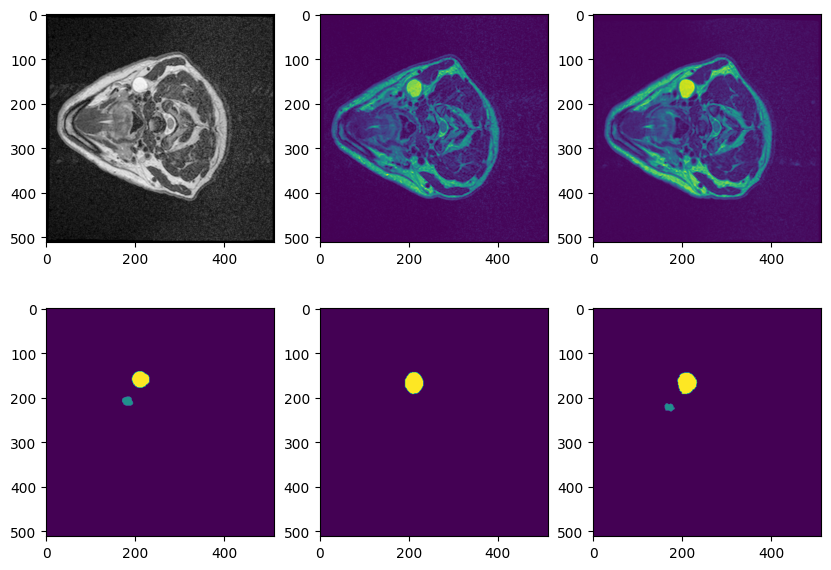

In [21]:
fig, ax = plt.subplots(2, 3, figsize=(10, 7))
ax[0, 0].imshow(AdjustContrast(0.5)(train_preRT_t2)[:, :, slice], cmap="gray")
ax[0, 1].imshow(train_midRT_t2[:, :, slice])
ax[0, 2].imshow(train_midRT_preRT_t2[:, :, slice])
ax[1, 0].imshow(train_preRT_mask[:, :, slice])
ax[1, 1].imshow(train_midRT_mask[:, :, slice])
ax[1, 2].imshow(train_midRT_preRT_mask[:, :, slice])
plt.show()

In [6]:
import numpy as np

In [7]:
np.unique(train_midRT_preRT_mask, return_counts=True)

(array([0., 1., 2.]), array([19887939,     8613,    26392]))

In [1]:
from mamba_mic.data_modules.hnts_mrg import HNTSMRGDataModule
import torch

In [2]:
import matplotlib.pyplot as plt

In [3]:
from monai.transforms import Compose, AsDiscrete
from monai.data import decollate_batch

In [4]:
data = HNTSMRGDataModule(batch_size=1, task="midRT", num_workers=1)
data.prepare_data()
data.setup()

post_label = Compose([AsDiscrete(to_onehot=3)])

In [7]:
sample = data.val_set[0]
img = sample["image"]
label = sample["label"]

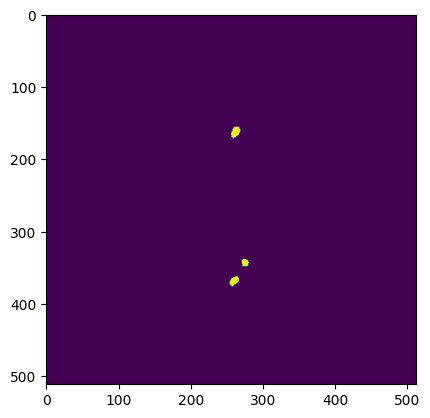

In [17]:
plt.imshow(img[4, :, :, 62])

In [21]:
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"

In [33]:
for batch in data.val_dataloader():
    y = batch["label"]
    print(y)
    print(y.shape)
    print(y.device)

    test = [post_label(y[i]) for i in range(y.shape[0])]
    break

metatensor([[[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],

          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],

          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],

          ...,

          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
       

In [3]:
train_img = data.train_set[0][0]["image"]
train_label = data.train_set[0][0]["label"]
test_img = data.test_set[0]["image"]
test_label = data.test_set[0]["label"]

In [4]:
print(train_img.shape)
print(train_label.shape)
print(test_img.shape)
print(test_label.shape)

torch.Size([1, 192, 192, 48])
torch.Size([1, 192, 192, 48])
torch.Size([1, 512, 512, 124])
torch.Size([1, 512, 512, 124])


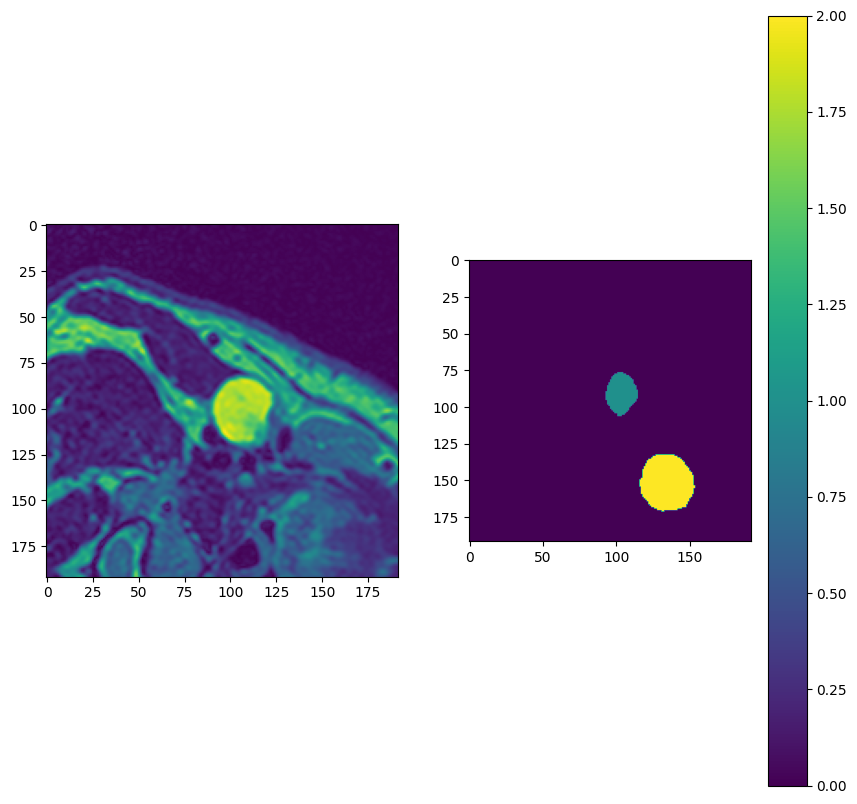

In [39]:
slice = 20

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
im1 = ax[0].imshow(train_img[0, :, :, slice])
im2 = ax[1].imshow(torch.argmax(train_label[:, :, :, slice]))
plt.colorbar(im2)
plt.show()

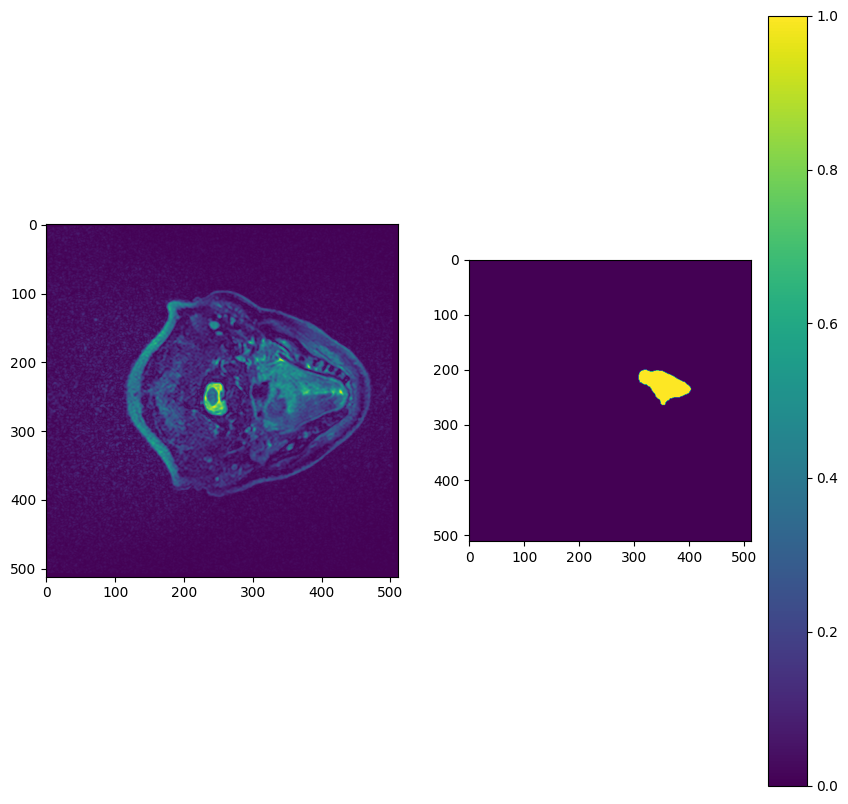

In [41]:
slice = 80
fig, ax = plt.subplots(1, 2, figsize=(10, 10))

im1 = ax[0].imshow(test_img[0, :, :, slice])
im2 = ax[1].imshow(post_label(test_label)[1, :, :, slice])
plt.colorbar(im2)
plt.show()

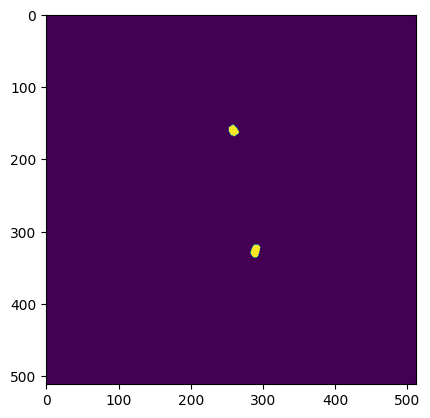

In [39]:
plt.imshow(test[0][2, :, :, 60])